In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [ ]:
df = pd.read_csv('/content/spam.csv', encoding='latin-1')

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

# **DATA CLEANING**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
# Drop last 3 columns because mostly values are non-null
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [ ]:
df.sample(5)

,v1,v2
2945,ham,make that 3! 4 fucks sake?! x
926,ham,But I'm on a diet. And I ate 1 too many slices...
3571,ham,"Yup, leaving right now, be back soon"
5526,spam,PRIVATE! Your 2003 Account Statement for shows...
2953,ham,Think i might have to give it a miss. Am teach...


In [ ]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [ ]:
df.sample(5)

,target,text
4732,ham,Good Morning my Dear Shijutta........... Have ...
1979,ham,Shhhhh nobody is supposed to know!
2053,ham,Oh... I was thkin of goin yogasana at 10 den n...
283,ham,Okie...
4056,ham,Noice. Text me when you're here


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
df['target'] = encoder.fit_transform(df['target'])

In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.isnull().sum()

,0
target,0
text,0


In [ ]:
df.duplicated().sum()

403

In [ ]:
df = df.drop_duplicates(keep='first')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(5169, 2)

# **EDA**

In [ ]:
df['target'].value_counts()

,count
target,
0,4516
1,653


In [ ]:
# 0 indicates ham
# 1 indicates spam messages

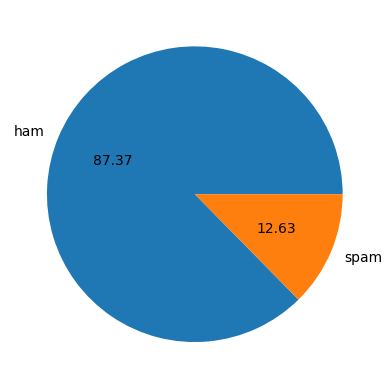

In [ ]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

**this pie plot show that 88% messages are not spam which indicates that this data is imbalanced.**

for deep analysis make 3 new columns that are number of words, character and sentences , for this, we need a library "NLTK"

In [ ]:
!pip install nltk

In [ ]:
import nltk

In [ ]:
df['num_character']=df['text'].apply(len)

In [ ]:
df.head()

,target,text,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df['num_sentence']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df.head()

,target,text,num_character,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


**i had creadted new features from already existing features(FEATURES ENGINEERING)**

In [ ]:
df[['num_character','num_words','num_sentence']].describe()

,num_character,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


**WE can see there is some sentences where maximum 910 num_characters, 220 num_words, 38 num_sentences are used, On an average, there is 78 num_chahracter, 18 num_words, roughly 2 num_sentences are used**

In [ ]:
# analyze ham and spam separately
# for ham messages
df[df['target']==0][['num_character','num_words','num_sentence']].describe()

,num_character,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
# analyze ham and spam separately
# for spam messages
df[df['target']==1][['num_character','num_words','num_sentence']].describe()

,num_character,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_character', ylabel='Count'>

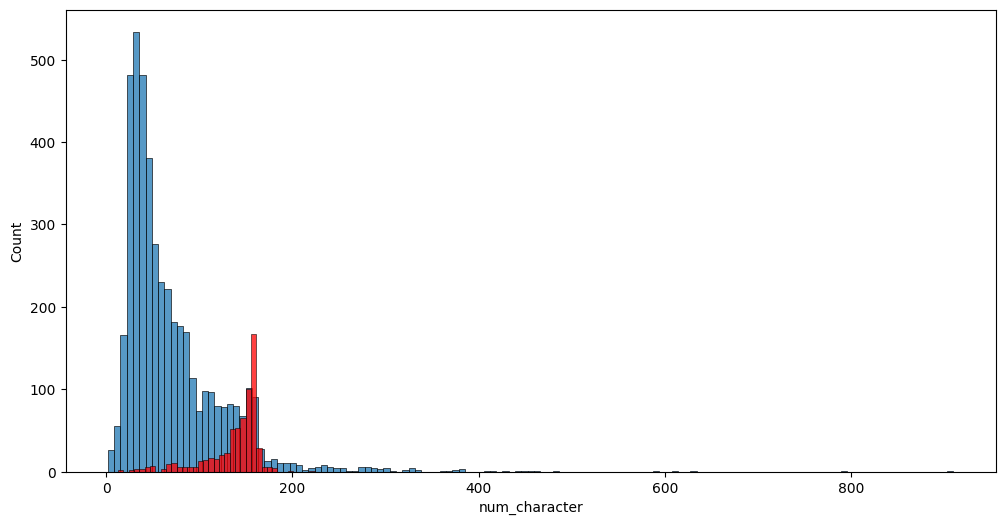

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_character'])
sns.histplot(df[df['target']==1]['num_character'], color='red')

**Num of charaters used in spam messages are greater in count as compared to the number of character used in ham messages**

<Axes: xlabel='num_words', ylabel='Count'>

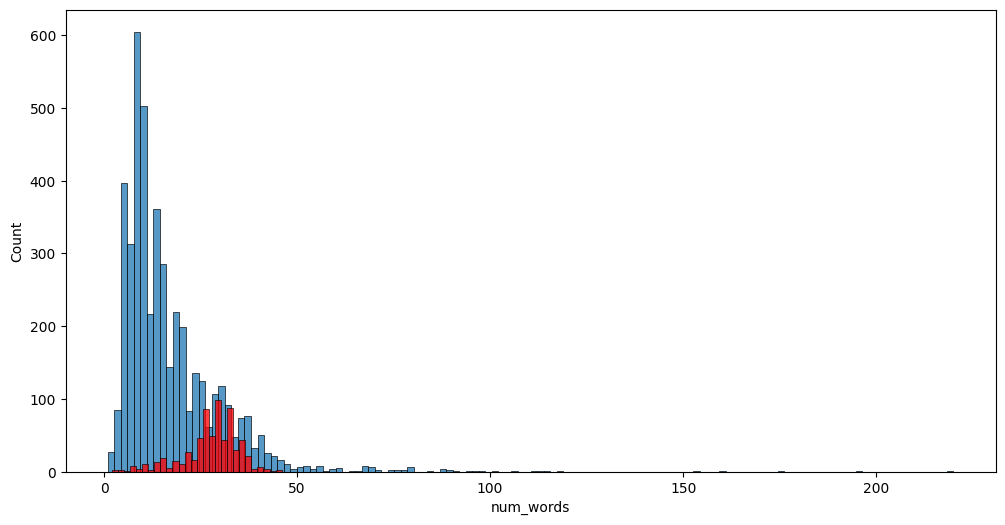

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'], color='red')

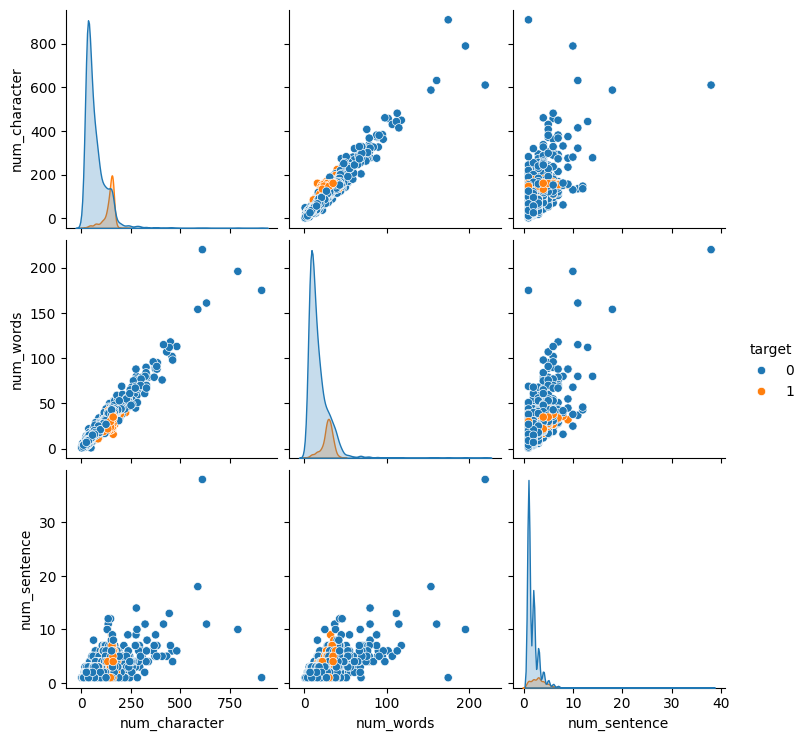

In [ ]:
sns.pairplot(df, hue='target')

**from this pairplot, we can clearly see that there is an outlier in our dataset**

In [ ]:
df.corr(numeric_only=True)

,target,num_character,num_words,num_sentence
target,1.000000,0.384717,0.262912,0.263939
num_character,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentence,0.263939,0.624139,0.679971,1.000000


<Axes: >

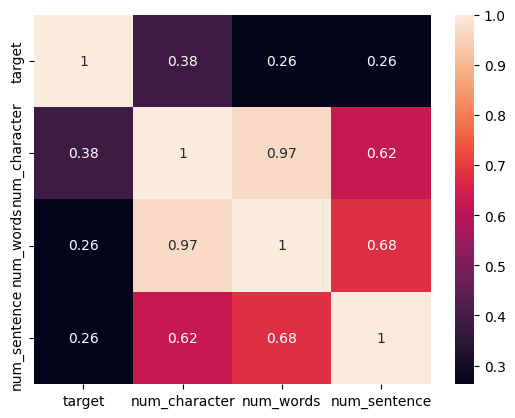

In [ ]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

**we can keep from the three new columns, only num_characters because it has strong coorelation with the strong 0.38 that is strong than the other two variables**

**DATA PREPROCESSING**


*   lower case
*   tokenization
*   removing special characters
*   removing stop words and punctuation
*   stemming








In [ ]:
def transform_text(text):
  text = text.lower()
  text=nltk.word_tokenize(text)

  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)
  text = y[:]
  y.clear()
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()
  for i in text:
    y.append(ps.stem(i))
  return " ".join(y)

In [ ]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [ ]:
df['text'][0]

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()
ps.stem('playing')

'play'

In [ ]:
df['transformed_text'] = df['text'].apply(transform_text)

In [ ]:
# Import WordCloud with the correct case
from wordcloud import WordCloud

# Instantiate WordCloud with the correct case
wc = WordCloud(width=500, height=500, min_font_size=10, background_color="white")

In [ ]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

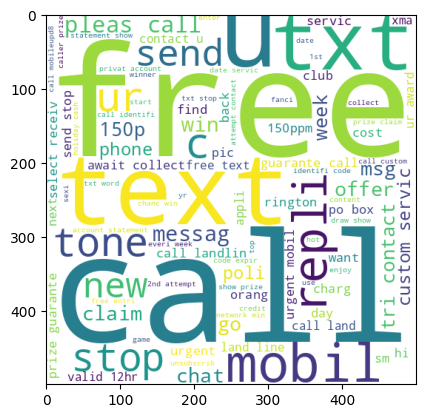

In [ ]:
plt.imshow(spam_wc)

**this plot shows that worlds that mostly we can see in spam messages**

In [ ]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

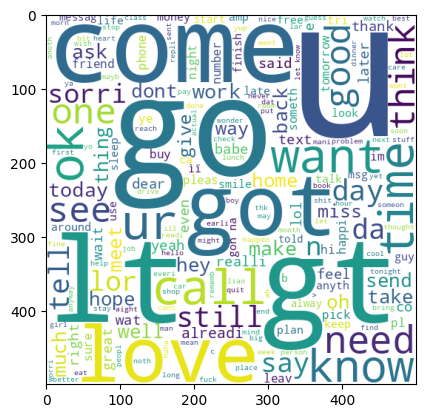

In [ ]:

plt.imshow(ham_wc)

**this plot shows that worlds that mostly we can see in ham messages**

In [ ]:
df.head()

,target,text,num_character,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
  #print(msg)
  for word in msg.split():
      spam_corpus.append(word)



In [ ]:
len(spam_corpus)

9939

In [ ]:
from collections import Counter
Counter(spam_corpus).most_common(50)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45),
 ('custom', 42),
 ('messag', 42),
 ('guarante', 42),
 ('per', 41),
 ('chat', 38),
 ('tri', 37),
 ('msg', 35),
 ('draw', 35),
 ('number', 35),
 ('cs', 35),
 ('show', 33),
 ('today', 33),
 ('offer', 33),
 ('line', 33),
 ('go', 32),
 ('receiv', 31),
 ('want', 31),
 ('latest', 30),
 ('rington', 30),
 ('landlin', 30)]

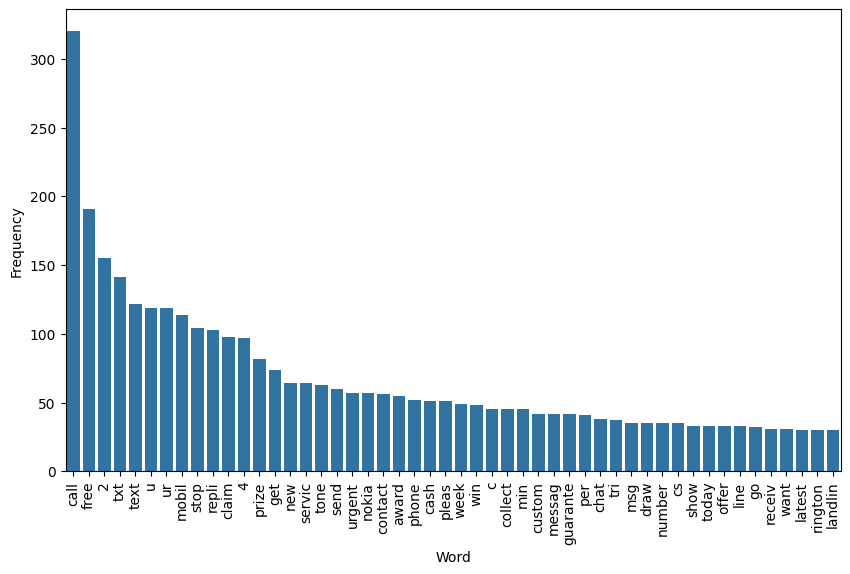

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
plt.figure(figsize=(10,6))

# Create a DataFrame from the most common words
df_spam_corpus = pd.DataFrame(Counter(spam_corpus).most_common(50), columns=['Word', 'Frequency'])

# Use the 'x' and 'y' keywords to specify the columns for the barplot
sns.barplot(x='Word', y='Frequency', data=df_spam_corpus)
plt.xticks(rotation='vertical')
plt.show() # Add this line to display the plot

In [ ]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
  #print(msg)
  for word in msg.split():
      ham_corpus.append(word)

In [ ]:
len(ham_corpus)

35404

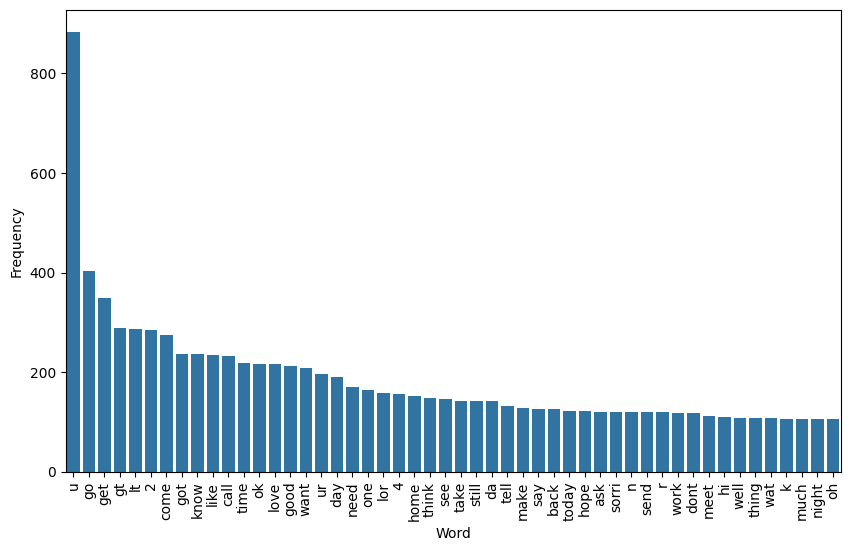

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
plt.figure(figsize=(10,6))

# Create a DataFrame from the most common words
df_ham_corpus = pd.DataFrame(Counter(ham_corpus).most_common(50), columns=['Word', 'Frequency'])

# Use the 'x' and 'y' keywords to specify the columns for the barplot
sns.barplot(x='Word', y='Frequency', data=df_ham_corpus)
plt.xticks(rotation='vertical')
plt.show() # Add this line to display the plot

# **Model Buildding**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)
# x=cv.fit_transform(df['transformed_text']).toarray()
x=tfidf.fit_transform(df['transformed_text']).toarray()
x.shape

(5169, 3000)

In [ ]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#x = scaler.fit_transform(x)

In [ ]:
# appending new character col to x
#x= np.hstack((x,df['num_character'].values.reshape(-1,1)))

In [ ]:
y=df['target'].values

In [ ]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [ ]:
gnb = GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [ ]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))


0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [ ]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [ ]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


**Here is the choice either we can go with bnb or mnb but in this caes precision score matters alot so i can go with the mnb (mnb gives zero false positive result)**

In [ ]:
# tfidf ---> mnb(choose)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
#

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)
#

In [ ]:
clfs={
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}


In [ ]:
!pip install scikit-learn
from sklearn.metrics import accuracy_score, precision_score  # Import accuracy_score and precision_score

def train_classifier(clf, x_train, x_test, y_train, y_test):
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)
  # Ensure accuracy_score and precision_score are from sklearn.metrics
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  return accuracy, precision

accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
  current_accuracy, current_precision = train_classifier(clf, x_train, x_test, y_train, y_test)
  print("For", name)
  print('Accuracy', current_accuracy)  # Corrected the typo: 'Acuuracy' to 'Accuracy'
  print("Precision", current_precision)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

For SVC
Accuracy 0.9758220502901354
Precision 0.9747899159663865
For KN
Accuracy 0.9052224371373307
Precision 1.0
For NB
Accuracy 0.9709864603481625
Precision 1.0
For DT
Accuracy 0.9294003868471954
Precision 0.8282828282828283
For LR
Accuracy 0.9584139264990329
Precision 0.9702970297029703
For RF
Accuracy 0.9758220502901354
Precision 0.9829059829059829


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For AdaBoost
Accuracy 0.960348162475822
Precision 0.9292035398230089
For BgC
Accuracy 0.9584139264990329
Precision 0.8682170542635659
For ETC
Accuracy 0.9748549323017408
Precision 0.9745762711864406
For GBDT
Accuracy 0.9468085106382979
Precision 0.9191919191919192
For xgb
Accuracy 0.9671179883945842
Precision 0.9262295081967213


In [ ]:
performance_df=pd.DataFrame({'Algorithm':clfs.keys(),'Acuuracy':accuracy_scores,"Precision":precision_scores}).sort_values("Precision", ascending=False)

In [ ]:
#temp_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Acuuracy': accuracy_scores, "Precision": precision_scores}).sort_values("Precision", ascending=False)

In [ ]:
performance_df1=pd.melt(performance_df, id_vars="Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Acuuracy,0.905222
1,NB,Acuuracy,0.970986
2,RF,Acuuracy,0.975822
3,SVC,Acuuracy,0.975822
4,ETC,Acuuracy,0.974855
5,LR,Acuuracy,0.958414
6,AdaBoost,Acuuracy,0.960348
7,xgb,Acuuracy,0.967118
8,GBDT,Acuuracy,0.946809
9,BgC,Acuuracy,0.958414


In [ ]:
performance_df

,Algorithm,Acuuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
10,xgb,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


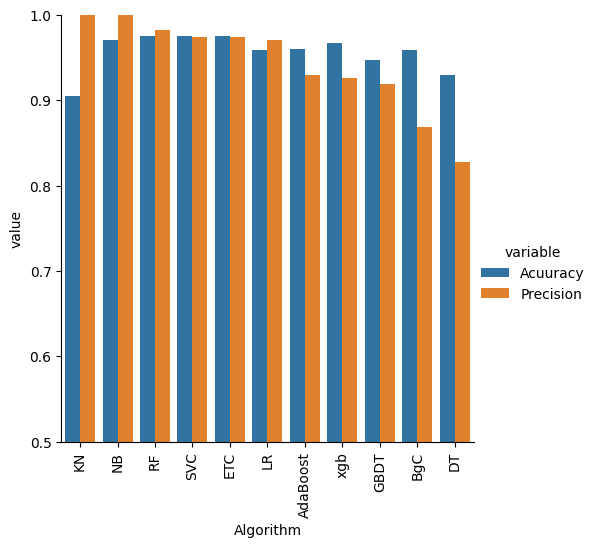

In [ ]:
sns.catplot(x='Algorithm', y='value', hue='variable',
            data=performance_df1, kind='bar', height=5)
plt.ylim(0.5,1)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# model improve
# 1. Change the max_features parameter of Tfidf (value is 3000)

In [ ]:
# first two without max_features 3000, and the next two are with the max_features 3000 of Tfidf

In [ ]:
#new_df.merge(temp_df,on='Algorithm')  by changing variables like tfidf max_features, Scaling, by adding num_character to x

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC # Added import for SVC

# Initialize SVC with probability=True
svc = SVC(probability=True) # Modified line to set probability=True

vc = VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)], voting='soft')
vc.fit(x_train,y_train)
y_pred = vc.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))



0.9796905222437138
[[894   2]
 [ 19 119]]
0.9834710743801653


In [ ]:
estimators = [('svm',svc),('nb',mnb),('et',etc)]
final_estimator = RandomForestClassifier()

In [ ]:
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [ ]:
#clf.fit(x_train,y_train)
#y_pred = clf.predict(x_test)
#print(accuracy_score(y_test,y_pred))
#print(confusion_matrix(y_test,y_pred))
#print(precision_score(y_test,y_pred))

In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))